In [1]:
#Importing Libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Reading dataset from the local directory
datapath = '/Users/neerajtadur/Downloads/ISB_COURSE_Python/Session08-RCode'
input = pd.read_csv(datapath+'/Universities.csv')
input.columns = input.columns.str.replace(' ', '_')
input.shape
input.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [3]:
## exclude the columns with university and state names
mydata = input.iloc[::,2:8]

In [4]:
## normalize the columns
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(mydata)
normalized_data = pd.DataFrame(normalized_data,columns=['SAT','Top10','Accept','SFRatio','Expenses','GradRate'])

In [5]:
## K-means clustering
from sklearn.cluster import KMeans
fit = KMeans(n_clusters=3, max_iter = 10, random_state=0).fit(normalized_data)
## n_clusters: either the number of clusters, or a set of initial (distinct) cluster centres. If a number, a random set of (distinct) rows in x is chosen as the initial centres.
## iter.max: the maximum number of iterations allowed.

In [6]:
fit.labels_  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.cluster_centers_ # A matrix of cluster centres.
fit.n_iter_ # The number of (outer) iterations.
fit.inertia_ # Total within-cluster sum of squares, i.e. sum(withinss).

44.531761731450956

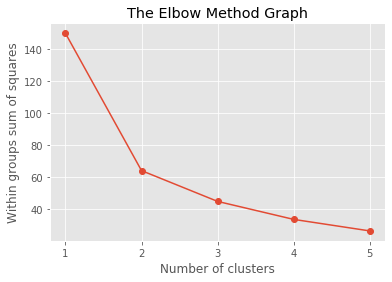

In [7]:
## Determine number of clusters
Cluster_Variability = []
for i in range(1,6): 
    kmeans =  KMeans(n_clusters=i).fit(normalized_data)
    Cluster_Variability.append(kmeans.inertia_)
#Plot the elbow graph
plt.plot(range(1,6),Cluster_Variability,marker='o')
plt.title('The Elbow Method Graph')
plt.xticks(range(1,6))
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

In [8]:
## some trivial analysis
fit = KMeans(n_clusters=4, max_iter = 10, random_state=0).fit(normalized_data)

In [9]:
UniversitiesWithClusterMembership = input

In [10]:
UniversitiesWithClusterMembership['fit$cluster'] = fit.labels_

In [11]:
UniversitiesWithClusterMembership.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,fit$cluster
0,Brown,RI,1310,89,22,13,22704,94,2
1,CalTech,CA,1415,100,25,6,63575,81,3
2,CMU,PA,1260,62,59,9,25026,72,0
3,Columbia,NY,1310,76,24,12,31510,88,2
4,Cornell,NY,1280,83,33,13,21864,90,0


In [12]:
input = UniversitiesWithClusterMembership

In [13]:
cluster1 = input.loc[input['fit$cluster']==0,]
cluster1.iloc[::,0] 
cluster2 = input.loc[input['fit$cluster']==1,]
cluster2.iloc[::,0] 
cluster3 = input.loc[input['fit$cluster']==2,]
cluster3.iloc[::,0]  
cluster4 = input.loc[input['fit$cluster']==3,]
cluster4.iloc[::,0] 

1         CalTech
9    JohnsHopkins
Name: Univ, dtype: object

In [14]:
#Aggregating columns on clusters
UniversitiesWithClusterMembership.groupby('fit$cluster').agg({'SAT':'mean','Top10':'mean','Accept':'mean','SFRatio':'mean','Expenses':'mean','GradRate':'mean'})


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
fit$cluster,,,,,,
0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [15]:
fit.cluster_centers_

array([[-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])